In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("datatraining.txt")


In [3]:
data_train.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
data_test = pd.read_csv("datatest2.txt")


In [5]:
data_test.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


## Since we have a large testing dataset as well, we will merge training and testing dataset, and then split the dataset using train_test_split

In [6]:
data_train_wo_date = data_train.drop('date',1)
print(data_train_wo_date.head(5))

   Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1        23.18   27.2720  426.0  721.25       0.004793          1
2        23.15   27.2675  429.5  714.00       0.004783          1
3        23.15   27.2450  426.0  713.50       0.004779          1
4        23.15   27.2000  426.0  708.25       0.004772          1
5        23.10   27.2000  426.0  704.50       0.004757          1


In [7]:
data_test_wo_date = data_test.drop('date',1)
print(data_test_wo_date.head(5))

   Temperature   Humidity       Light          CO2  HumidityRatio  Occupancy
1      21.7600  31.133333  437.333333  1029.666667       0.005021          1
2      21.7900  31.000000  437.333333  1000.000000       0.005009          1
3      21.7675  31.122500  434.000000  1003.750000       0.005022          1
4      21.7675  31.122500  439.000000  1009.500000       0.005022          1
5      21.7900  31.133333  437.333333  1005.666667       0.005030          1


In [8]:
data = data_train_wo_date.append(data_test_wo_date)

In [9]:
data.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
data.shape

(17895, 6)

In [11]:
data.drop_duplicates()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.180,27.2720,426.00,721.25,0.004793,1
2,23.150,27.2675,429.50,714.00,0.004783,1
3,23.150,27.2450,426.00,713.50,0.004779,1
4,23.150,27.2000,426.00,708.25,0.004772,1
5,23.100,27.2000,426.00,704.50,0.004757,1
...,...,...,...,...,...,...
9748,20.815,27.7175,429.75,1505.25,0.004213,1
9749,20.865,27.7450,423.50,1514.50,0.004230,1
9750,20.890,27.7450,423.50,1521.50,0.004237,1
9751,20.890,28.0225,418.75,1632.00,0.004279,1


In [12]:
data.shape

(17895, 6)

In [13]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000
mean,20.827630,27.998747,121.453183,686.479722,0.004258,0.211120
std,1.036616,5.169896,202.207255,313.669585,0.000784,0.408115
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.100000,24.890000,0.000000,458.750000,0.003767,0.000000
50%,20.625000,27.793333,0.000000,564.000000,0.004343,0.000000
75%,21.500000,31.856667,217.916667,792.000000,0.004860,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.006476,1.000000


## Using scikit-learn’s DecisionTreeClassifier, we train a supervised learning model that can be used to generate predicions for our data.

In [14]:
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn import preprocessing


In [15]:
X = data.iloc[:,0:5]
y = data.iloc[:,5:]

In [16]:
print(X.head(5))

   Temperature  Humidity  Light     CO2  HumidityRatio
1        23.18   27.2720  426.0  721.25       0.004793
2        23.15   27.2675  429.5  714.00       0.004783
3        23.15   27.2450  426.0  713.50       0.004779
4        23.15   27.2000  426.0  708.25       0.004772
5        23.10   27.2000  426.0  704.50       0.004757


In [17]:
print(y.head(5))

   Occupancy
1          1
2          1
3          1
4          1
5          1


In [18]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [19]:
X_train.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio
502,21.000,25.000,0.0,439.50,0.003841
6172,19.390,26.840,0.0,459.00,0.003732
1413,22.290,25.030,433.0,970.00,0.004164
7195,22.100,38.290,433.0,1901.75,0.006318
8813,22.175,34.425,433.0,1809.25,0.005700


In [20]:
model = tree.DecisionTreeClassifier()
# training the model
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)[:, 1]

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

#It is the number of correct predictions made (TP+TN) divided by the total number of predictions made(TP+TN+FP+FN).
# For Our model,we have achieved a high accuracy.

99.0314769975787

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

#Recall (sensitivity) is the fraction of positives events that we predict correctly. Recall = TP/(TP+FN)
#Higher Recall value for our classifier indicates that less positive events are predicted in the negative class. 

0.9854280510018215

In [24]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

#Precision is the fraction of predicted positives events that are actually positive. Precision = TP/(TP+FP)

0.9677996422182469

In [25]:
#we want the classifier to have higher recall and precision values to decrease the number of FP and FN
#With Higher precision and recall values, the number of occupant events that will be incorrectly classified as
#non-occupant and vice versa will be very low.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       1.00      0.99      0.99      4271
     class-1       0.97      0.99      0.98      1098

    accuracy                           0.99      5369
   macro avg       0.98      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



In [27]:
#Classification report is used to measure the quality of predictions i.e. how many predictions are TP, FP, TN, FN
#Furthermore, these values are used to calculate recall, precision score, f1 score,
#and average of all.


#We have already discusses about precision and recall values. Now,
#the f1 score is the harmonic mean of recall and precision, and higher the score better the model.
#Support is the number of occurrences of each class in y_test.
#Since, Our score(average) is around 0.99, we can deduce that the model fits the dataset correctly.

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[0,1])

array([[4235,   36],
       [  16, 1082]])

In [29]:
#From the confusion matrix, we can deduce that 5320 out of 5369 instances in test dataset were accurately predicted.
#(The diagonal elements show the number of correct classifications for each class)

#4216 instances out of 4238 were predicted as 0
#1104 instances out of 1131 were predicted as 1

#The total negative instances in (0) test dataset FP + TN = 4238.
#The total positive instances (1) in test dataset TP + FN = 1131.

#Because of high recall and precision value, less FN and TN, we can say that the classifier is reliable.

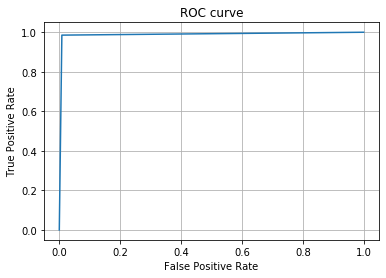

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, th = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [31]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.9884995558216789

In [32]:
#For the ROC curve, TP rate is plotted againest FP rate. We have the ROC curve that passes through top left
#( approx ~ 100% sensitivity, 100% specificity), and the
#closer the ROC curve is to the top left, the better our model performs.

#Also, high value AUC (Area under curve) manifests this. 

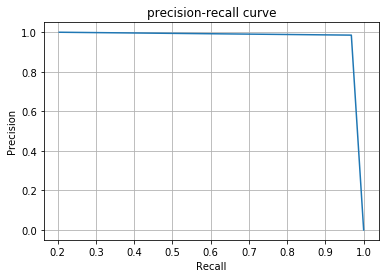

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall)
plt.title('precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [34]:
#Definition :- Precision-Recall curves summarize the trade-off between the TP rate and the positive predictive
#value for a predictive model.

#precision-recall curve are normally used for imbalanced dataset, but in our case, is balanced.
#precision-recall curve manifest high accuracy for our model. 